## CNN on Fashion-MNIST dataset with keras

#### Dataset Details:

Fashion-MNIST is a dataset of Zalando's article images - consisting of a training set of 60,000 images and a test set of 10,000 images. 

Each image is a 28x28 grayscale image, associated with a label from the following 10 classes:-

0 - T-shirt/top, 1 - Trouser, 2 - Pullover, 3 - Dress, 4 - Coat, 5 - Sandal, 6 - Shirt, 7 - Sneaker, 8 - Bag, 9 - Ankle boot

![title](fashion-mnist-labels.jpg)


#### Fix random seed for reproducibility

In [1]:
import numpy as np
np.random.seed(123) 

##### Keras model module

    Import the Sequential model type from Keras. This is simply a linear stack of neural network layers

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

##### Keras CNN layers

    Import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data:

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#### Load image data from Fashion-MNIST dataset.

    Dataset of 60,000 28x28 grayscale images of the 10 classes, along with a test set of 10,000 images.

In [5]:
from tensorflow.keras.datasets import fashion_mnist
 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Returns:

    2 tuples:
            x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
            y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).



Look at the shape of the dataset:

In [6]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


#### Preprocess input data for Keras

In [7]:
print (X_train.shape[0])

60000


 Print X_train's dimensions

In [7]:
print (X_train.shape)

(60000, 28, 28)


#### Display the original image from X_train set

In [8]:
X_train[0].shape

(28, 28)

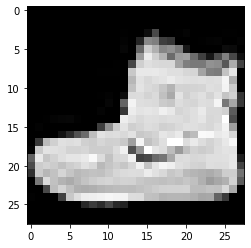

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(20, 10))

# display original image
#ax = plt.subplot(2, 1, 1)
plt.imshow(X_train[0].reshape(28, 28))
#plt.gray()

#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

plt.show()

#### Print 28*28 image matrix (pixel values) for above image

In [ ]:
import pandas as pd
im

In [17]:
image1_array = X_train[0]
np.set_printoptions(linewidth=150)
#pd.DataFrame(image1_array)
image1_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

Convert our data type to float32 and normalize our data values to the range [0, 1]

Note: Max value X_train/X_test can take is 255, so it is divided by 255

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

#### Preprocess class labels for Keras

Look at the shape of our class label data

In [13]:
print (y_train.shape)

(60000,)


We should have 10 different classes, one for each image, but it looks like we only have a 1-dimensional array.

In [14]:
print (y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


### Using a simple MLP

In [ ]:
# input shape for one sqample: (28,28)
# 
# 28*28  

(60000,28,28)

In [19]:
# Using simple MLP
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # op: flattened 28*28 1D tensor
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5034 - accuracy: 0.8251
Epoch 2/2
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3798 - accuracy: 0.8641


### Using CNN

Reshape input data

    When using the tensorflow backend, you must explicitly declare a dimension for the depth of the input image. 
    E.g. a full-color image with all 3 RGB channels will have a depth of 3.
    Our Fashion-MNIST images only have a depth of 1, but we must explicitly declare that. 
    In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, channel).

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape

(60000, 28, 28, 1)

 Print X_train's dimensions

In [17]:
print (X_train.shape)

(60000, 28, 28, 1)


#### Define model architecture.

Declaring a sequential model

In [35]:
model = Sequential()

#### The Feature Extraction Part of the network
Declare the input layer

CNN input layer

In [36]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
# filters - kernels 

#### 2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(28, 28, 1) for 28x28 gray pictures in data_format="channels_last".

First parameters correspond to the number of convolution filters 

Next 2 parameters correspond to kernel size

#### Add more layers to our model

In [37]:
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#### Understanding the output shape and number of parameters in CNN


We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border, then the output volume shape is computed as (W-F+2P)/S + 1. 

In [34]:
toy_model=Sequential()
toy_model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(5,5,3)))
toy_model.add(Conv2D(1,(3,3), activation='relu'))
toy_model.summary()

#outputshape, num params  
# Filter/lernel: (k,k,d), 
# number of kernels: n
# #params = (k*k*d + 1) * n 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 3, 3, 10)          280       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 1)           91        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


Dropout

    This is a method for regularizing our model in order to prevent overfitting. 

MaxPooling2D 

    Is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer

##### The classification part of the network

In [39]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

#### Compile model

Compile the model by providing the loss function and the optimizer 

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.4731 - accuracy: 0.8300
Epoch 2/2
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.3521 - accuracy: 0.8745


#### Evaluate the model on test data.

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.3086312720775604, 0.8915]


#### Make predictions on test data 

In [31]:
# calculate predictions
predictions = model.predict(X_test)

In [32]:
print (predictions)

[[7.7405258e-07 7.0781908e-08 1.6525890e-07 ... 1.1375765e-03 4.0696995e-07 9.9843782e-01]
 [1.1510880e-05 3.3283917e-11 9.9995351e-01 ... 6.6444849e-14 1.1698200e-08 2.3494835e-12]
 [2.7687657e-08 9.9999976e-01 2.9369638e-09 ... 1.6399511e-12 3.0818357e-09 5.6206374e-13]
 ...
 [5.6788764e-07 4.5999156e-09 3.2371167e-06 ... 8.0557875e-08 9.9998248e-01 8.9643514e-08]
 [1.2086995e-09 9.9999917e-01 2.4909741e-10 ... 2.1065129e-12 1.7637215e-11 1.5791745e-12]
 [1.8621405e-03 1.8441075e-04 5.8183045e-04 ... 5.5692919e-02 1.9354014e-02 3.6729879e-03]]


In [33]:
y_pred_class = model.predict_classes(X_test)

In [34]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9035

In [35]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[871,   1,  12,  19,   3,   3,  82,   0,   9,   0],
       [  0, 980,   0,  14,   3,   0,   1,   0,   2,   0],
       [ 16,   1, 882,   7,  54,   0,  39,   0,   1,   0],
       [ 12,   8,   9, 904,  36,   0,  25,   0,   6,   0],
       [  0,   1,  92,  21, 843,   0,  41,   0,   2,   0],
       [  0,   0,   0,   0,   0, 979,   0,  15,   0,   6],
       [125,   1,  96,  24,  75,   0, 661,   0,  18,   0],
       [  0,   0,   0,   0,   0,   5,   0, 973,   0,  22],
       [  2,   2,   2,   3,   2,   3,   1,   4, 981,   0],
       [  0,   0,   0,   0,   0,   7,   0,  32,   0, 961]])

In [36]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.88      0.84      1000
           3       0.91      0.90      0.91      1000
           4       0.83      0.84      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.66      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Reference: 

    https://keras.io/
    http://scikit-learn.org/stable/modules/classes.html
    https://github.com/zalandoresearch/fashion-mnist